In [149]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
stats = "/Users/toddhendricks/Downloads/leaguedashplayerstats_LeagueDashPlayerStats__PerMode-PerGame_LeagueID-00_Season-2019-20_SeasonType-Regular Season.csv"

In [21]:
nba_df = pd.read_csv(stats)

In [22]:
nba_df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

Text(0.5, 1.0, 'NBA Player Age: 2019-2020')

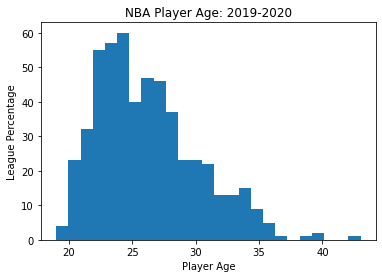

In [29]:
plt.hist(x=nba_df['AGE'], bins=25)
plt.xlabel("Player Age")
plt.ylabel("League Percentage")
plt.title("NBA Player Age: 2019-2020")

In [30]:
# Who played the most?

In [50]:
most_active_gp = nba_df.sort_values(by=['GP'],ascending=False).head(10)
most_active_min = nba_df.sort_values(by=['MIN'],ascending=False).head(10)

In [54]:
most_active_combined = pd.concat([most_active_gp,most_active_min])

In [56]:
most_active_combined[['PLAYER_NAME','TEAM_ABBREVIATION','AGE','GP','MIN']]

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,MIN
363,Maxi Kleber,DAL,28,74,25.5
395,Nikola Jokic,DEN,25,73,32.0
143,Duncan Robinson,MIA,26,73,29.7
371,Mikal Bridges,PHX,23,73,28.0
379,Monte Morris,DEN,25,73,22.4
132,Dillon Brooks,MEM,24,73,28.9
116,Delon Wright,DAL,28,73,21.5
277,Justin Holiday,IND,31,73,25.0
388,Nemanja Bjelica,SAC,32,72,27.9
249,Joe Ingles,UTA,32,72,29.7


In [66]:
young_guns = nba_df[nba_df['AGE'] < 25]

In [69]:
young_guns.sort_values(by=["PTS","FG_PCT"],ascending=False).head(5)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
488,1629027,Trae Young,1610612737,ATL,21,60,18,42,0.300,35.3,...,9,272,2,4,472,9,17,12,5,16290271610612737
334,1629029,Luka Doncic,1610612742,DAL,21,61,36,25,0.590,33.6,...,21,88,4,6,35,3,10,1,5,16290291610612742
126,1626164,Devin Booker,1610612756,PHX,23,70,34,36,0.486,35.9,...,34,33,8,10,113,25,46,29,5,16261641610612756
288,1626157,Karl-Anthony Towns,1610612750,MIN,24,35,10,25,0.286,33.9,...,26,16,17,11,268,6,21,29,5,16261571610612750
135,1628378,Donovan Mitchell,1610612762,UTA,23,69,43,26,0.623,34.3,...,83,93,43,15,127,41,187,29,5,16283781610612762


In [70]:
# Who is the most well-rounded

In [100]:
tuples = list(zip(nba_df['TEAM_ABBREVIATION'].values, nba_df['PLAYER_ID'].values))

In [101]:
index = pd.MultiIndex.from_tuples(tuples, names=['team', 'id'])

In [103]:
nba_df = nba_df.set_index(keys=index).sort_index(level=0)

In [110]:
age = nba_df.groupby(level=0)['AGE'].agg([np.mean, np.std])

In [113]:
age.sort_values(by='mean', ascending=False)

,mean,std
team,,
MIL,29.500000,4.531372
HOU,29.400000,4.405738
LAL,28.777778,4.808761
LAC,27.764706,4.008264
DAL,27.222222,3.734664
MIA,26.944444,5.460793
BKN,26.909091,4.868843
PHI,26.352941,3.481041
ORL,26.210526,3.029099


In [116]:
dd = nba_df.sort_values(by='DD2_RANK',ascending=True).head(10)
td = nba_df.sort_values(by='TD3_RANK',ascending=True).head(10)

In [129]:
big_contributors = pd.concat([dd,td])

In [131]:
big_contributors = big_contributors[['PLAYER_NAME','AGE','PTS','FG_PCT', 'REB', 'AST', 'FT_PCT', 'STL', 'BLK']]

In [132]:
big_contributors

,,PLAYER_NAME,AGE,PTS,FG_PCT,REB,AST,FT_PCT,STL,BLK
team,id,,,,,,,,,
MIL,203507,Giannis Antetokounmpo,25,29.5,0.553,13.6,5.6,0.633,1.0,1.0
POR,202355,Hassan Whiteside,31,15.5,0.621,13.5,1.2,0.686,0.4,2.9
IND,1627734,Domantas Sabonis,24,18.5,0.540,12.4,5.0,0.723,0.8,0.5
UTA,203497,Rudy Gobert,28,15.1,0.693,13.5,1.5,0.630,0.8,2.0
CLE,203083,Andre Drummond,26,17.7,0.533,15.2,2.7,0.575,1.9,1.6
LAL,2544,LeBron James,35,25.3,0.493,7.8,10.2,0.693,1.2,0.5
DEN,203999,Nikola Jokic,25,19.9,0.528,9.7,7.0,0.817,1.2,0.6
ORL,202696,Nikola Vucevic,29,19.6,0.477,10.9,3.6,0.784,0.9,0.8
MIA,1628389,Bam Adebayo,22,15.9,0.557,10.2,5.1,0.691,1.1,1.3


Text(0.5, 1.0, 'Top Players : Points vs. Percentage')

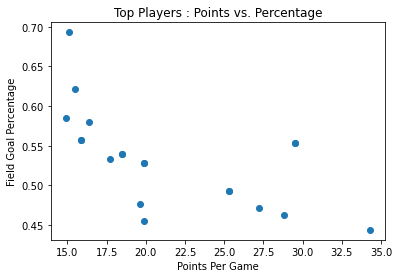

In [134]:
plt.scatter(big_contributors['PTS'],big_contributors['FG_PCT'])
plt.xlabel('Points Per Game')
plt.ylabel('Field Goal Percentage')
plt.title('Top Players : Points vs. Percentage')

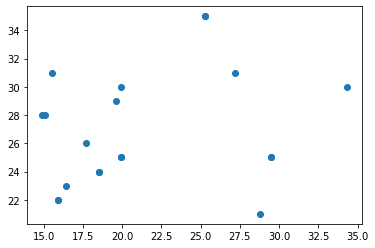

In [136]:
plt.scatter(big_contributors['PTS'], big_contributors['AGE'])

In [146]:
reb = big_contributors['REB']
pts = big_contributors['PTS']
ast = big_contributors['AST']
names = big_contributors['PLAYER_NAME']
ax = pd.DataFrame(data={'reb' : reb, 'pts' : pts, 'ast': ast})

In [147]:
ax['Names'] = names

In [148]:
sns.barplot(x=ax['Names'],y=)

,,reb,pts,ast,Names
team,id,,,,
MIL,203507,13.6,29.5,5.6,Giannis Antetokounmpo
POR,202355,13.5,15.5,1.2,Hassan Whiteside
IND,1627734,12.4,18.5,5.0,Domantas Sabonis
UTA,203497,13.5,15.1,1.5,Rudy Gobert
CLE,203083,15.2,17.7,2.7,Andre Drummond
LAL,2544,7.8,25.3,10.2,LeBron James
DEN,203999,9.7,19.9,7.0,Nikola Jokic
ORL,202696,10.9,19.6,3.6,Nikola Vucevic
MIA,1628389,10.2,15.9,5.1,Bam Adebayo


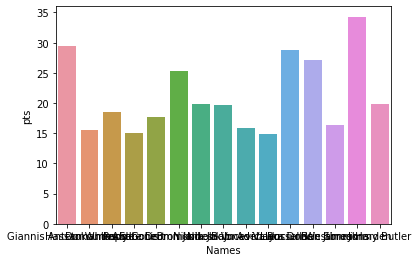

In [156]:
sns.barplot(x=ax['Names'],y=ax['pts'])

In [169]:
nba_df['efficiency'] = nba_df['FGM'] / nba_df['MIN']

In [172]:
nba_df.nlargest(10,'efficiency')

,,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,efficiency
team,id,,,,,,,,,,,,,,,,,,,,,
MIL,203507,203507,Giannis Antetokounmpo,1610612749,MIL,25,63,51,12,0.810,30.4,...,30,1,5,2,2,1,6,5,2035071610612749,0.358553
BOS,1629605,1629605,Tacko Fall,1610612738,BOS,24,7,5,2,0.714,4.6,...,419,427,423,162,432,239,29,5,16296051610612738,0.347826
LAL,1629719,1629719,Devontae Cacok,1610612747,LAL,23,1,0,1,0.000,8.9,...,524,513,305,19,309,239,29,5,16297191610612747,0.337079
BKN,2037,2037,Jamal Crawford,1610612751,BKN,40,1,1,0,1.000,6.0,...,419,320,351,39,393,239,29,5,20371610612751,0.333333
CHI,1629622,1629622,Max Strus,1610612741,CHI,24,2,0,2,0.000,3.1,...,489,513,456,8,510,239,29,5,16296221610612741,0.322581
NOP,1629627,1629627,Zion Williamson,1610612740,NOP,19,24,11,13,0.458,27.8,...,269,16,21,79,56,142,29,5,16296271610612740,0.316547
TOR,1629044,1629044,Shamorie Ponds,1610612761,TOR,22,4,4,0,1.000,2.6,...,489,491,467,231,491,239,29,5,16290441610612761,0.307692
BKN,202681,202681,Kyrie Irving,1610612751,BKN,28,20,8,12,0.400,32.9,...,70,25,7,263,13,115,17,5,2026811610612751,0.303951
MEM,1628605,1628605,Dusty Hannahs,1610612763,MEM,26,2,0,2,0.000,6.7,...,489,442,305,82,451,239,29,5,16286051610612763,0.298507


In [184]:
nba_df.sort_values('efficiency', ascending=False)

,,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,efficiency
team,id,,,,,,,,,,,,,,,,,,,,,
MIL,203507,203507,Giannis Antetokounmpo,1610612749,MIL,25,63,51,12,0.810,30.4,...,30,1,5,2,2,1,6,5,2035071610612749,0.358553
BOS,1629605,1629605,Tacko Fall,1610612738,BOS,24,7,5,2,0.714,4.6,...,419,427,423,162,432,239,29,5,16296051610612738,0.347826
LAL,1629719,1629719,Devontae Cacok,1610612747,LAL,23,1,0,1,0.000,8.9,...,524,513,305,19,309,239,29,5,16297191610612747,0.337079
BKN,2037,2037,Jamal Crawford,1610612751,BKN,40,1,1,0,1.000,6.0,...,419,320,351,39,393,239,29,5,20371610612751,0.333333
CHI,1629622,1629622,Max Strus,1610612741,CHI,24,2,0,2,0.000,3.1,...,489,513,456,8,510,239,29,5,16296221610612741,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSW,1626184,1626184,Chasson Randle,1610612744,GSW,27,3,2,1,0.667,13.5,...,419,320,493,346,446,239,29,5,16261841610612744,0.000000
CLE,1629122,1629122,J.P. Macura,1610612739,CLE,25,1,1,0,1.000,0.6,...,524,513,525,70,529,239,29,5,16291221610612739,0.000000
HOU,1629739,1629739,William Howard,1610612745,HOU,26,2,1,1,0.500,6.6,...,489,513,525,527,522,239,29,5,16297391610612745,0.000000


In [183]:
y

PLAYER_ID PLAYER_NAME  TEAM_ID TEAM_ABBREVIATION  AGE  GP   W  \
team id                                                                       
ATL  1713           NaN         NaN      NaN               NaN  NaN NaN NaN   
     201952         NaN         NaN      NaN               NaN  NaN NaN NaN   
     202718         NaN         NaN      NaN               NaN  NaN NaN NaN   
     203473         NaN         NaN      NaN               NaN  NaN NaN NaN   
     203991         NaN         NaN      NaN               NaN  NaN NaN NaN   
...                 ...         ...      ...               ...  ...  ..  ..   
WAS  1629067        NaN         NaN      NaN               NaN  NaN NaN NaN   
     1629140        NaN         NaN      NaN               NaN  NaN NaN NaN   
     1629620        NaN         NaN      NaN               NaN  NaN NaN NaN   
     1629678        NaN         NaN      NaN               NaN  NaN NaN NaN   
     1629726        NaN         NaN      NaN               NaN  NaN NaN NaN   

               L  W_PCT  MIN  ...  PF_RANK  PFD_RANK  PTS_RANK  \
team id                       ...                                
ATL  1713    NaN    NaN  NaN  ...      NaN       NaN       NaN   
     201952  NaN    NaN  NaN  ...      NaN       NaN       NaN   
     202718  NaN    NaN  NaN  ...      NaN       NaN       NaN   
     203473  NaN    NaN  NaN  ...      NaN       NaN       NaN   
     203991  NaN    NaN  NaN  ...      NaN       NaN       NaN   
...           ..    ...  ...  ...      ...       ...       ...   
WAS  1629067 NaN    NaN  NaN  ...      NaN       NaN       NaN   
     1629140 NaN    NaN  NaN  ...      NaN       NaN       NaN   
     1629620 NaN    NaN  NaN  ...      NaN       NaN       NaN   
     1629678 NaN    NaN  NaN  ...      NaN       NaN       NaN   
     1629726 NaN    NaN  NaN  ...      NaN       NaN       NaN   

              PLUS_MINUS_RANK  NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  CFID  \
team id                                                                         
ATL  1713                 NaN                   NaN       NaN       NaN   NaN   
     201952               NaN                   NaN       NaN       NaN   NaN   
     202718               NaN                   NaN       NaN       NaN   NaN   
     203473               NaN                   NaN       NaN       NaN   NaN   
     203991               NaN                   NaN       NaN       NaN   NaN   
...                       ...                   ...       ...       ...   ...   
WAS  1629067              NaN                   NaN       NaN       NaN   NaN   
     1629140              NaN                   NaN       NaN       NaN   NaN   
     1629620              NaN                   NaN       NaN       NaN   NaN   
     1629678              NaN                   NaN       NaN       NaN   NaN   
     1629726              NaN                   NaN       NaN       NaN   NaN   

              CFPARAMS  efficiency  
team id                             
ATL  1713          NaN         NaN  
     201952        NaN         NaN  
     202718        NaN         NaN  
     203473        NaN         NaN  
     203991        NaN         NaN  
...                ...         ...  
WAS  1629067       NaN         NaN  
     1629140       NaN         NaN  
     1629620       NaN         NaN  
     1629678       NaN         NaN  
     1629726       NaN         NaN  

[529 rows x 66 columns]